# Capstone project

1\. Create a directory named `capstone_2017` and version control that directory using git

2\. Create a subfolder called `data` inside that directory

3\. Download the [gapminder](https://raw.githubusercontent.com/upendrak/advance_R/master/data/gapminder.csv) dataset using your favorite linux commands into `data` subfolder

In [ ]:
wget https://raw.githubusercontent.com/upendrak/advance_R/master/data/gapminder.csv --no-check-certificate

4\. Create a function in Python that plots year on the x-axis and lifeExp on the y-axis for a particular country in Juypter notebook

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

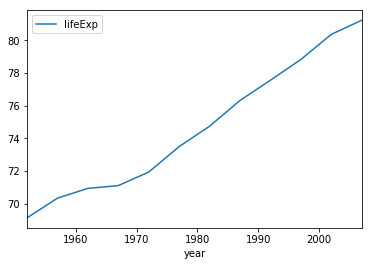

In [2]:
def plot_country_year_vs_type(country, plot_type):
    data = pd.read_csv("data/gapminder.csv")
    df_country = data[data['country'] == country]
    df_country.plot(x='year', y=plot_type)

plot_country_year_vs_type("Australia", "lifeExp")

5\. Commit all the files and folder, the data folder, and the Jupyter notebook

6\. Use `git` to push your changes to your remote repo on github

7\. Adjust the function to compare n contries provided as a list

_Hint: unique is a common function to get the values of a list_

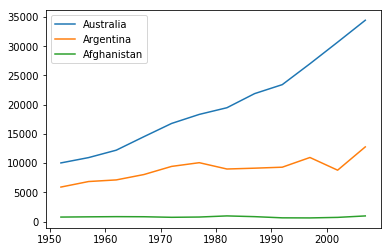

In [3]:
def plot_countries_year_vs_type(countries, plot_type):
    data = pd.read_csv("data/gapminder.csv")
    years = data.year.unique()
    for country in countries:
        df_country = data[data['country'] == country]
        plt.plot(years, df_country[plot_type], label=country)
    plt.legend()
    
plot_countries_year_vs_type(["Australia", "Argentina", "Afghanistan"], "gdpPercap")

## What are some interesting points in gdpPercap, lifeExp, and pop?

In [4]:
data = pd.read_csv("data/gapminder.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
country      1704 non-null object
year         1704 non-null int64
pop          1704 non-null float64
continent    1704 non-null object
lifeExp      1704 non-null float64
gdpPercap    1704 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 80.0+ KB


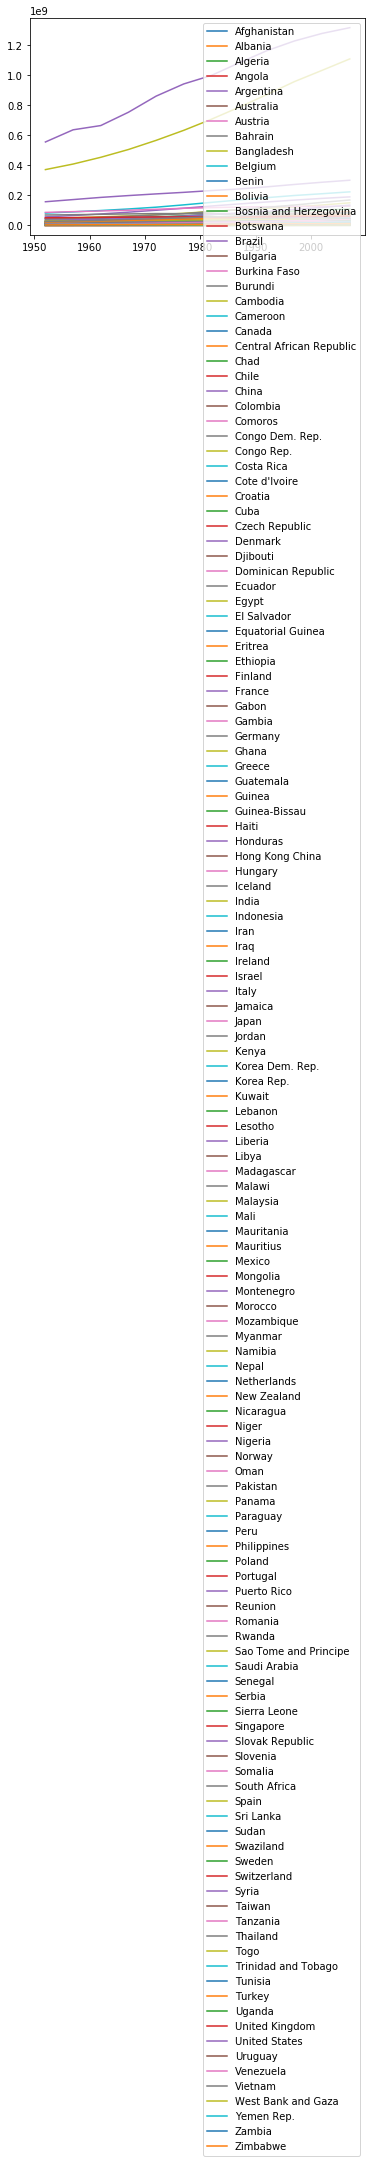

In [5]:
def plot_all_countries(plot_type):
    data = pd.read_csv("data/gapminder.csv")
    countries = data.country.unique()
    years = data.year.unique()
    for country in countries:
        df_country = data[data['country'] == country]
        plt.plot(years, df_country[plot_type], label=country)
    plt.legend()
plot_all_countries("pop")

8\. Which country is an outlier in gdpPercap?

In [6]:
data = pd.read_csv("data/gapminder.csv")

In [7]:
data.describe()

,year,pop,lifeExp,gdpPercap
count,1704.00000,1.704000e+03,1704.000000,1704.000000
mean,1979.50000,2.960121e+07,59.474439,7215.327081
std,17.26533,1.061579e+08,12.917107,9857.454543
min,1952.00000,6.001100e+04,23.599000,241.165877
25%,1965.75000,2.793664e+06,48.198000,1202.060309
50%,1979.50000,7.023596e+06,60.712500,3531.846989
75%,1993.25000,1.958522e+07,70.845500,9325.462346
max,2007.00000,1.318683e+09,82.603000,113523.132900


In [8]:
data[data["gdpPercap"]==113523.132900]

,country,year,pop,continent,lifeExp,gdpPercap
853,Kuwait,1957,212846.0,Asia,58.033,113523.1329


9\. Which country is the outlier in lifeExp?

In [9]:
data[data["lifeExp"]==23.599000]

,country,year,pop,continent,lifeExp,gdpPercap
1292,Rwanda,1992,7290203.0,Africa,23.599,737.068595


In [10]:
data[data["lifeExp"]==82.603000]

,country,year,pop,continent,lifeExp,gdpPercap
803,Japan,2007,127467972.0,Asia,82.603,31656.06806


10\. Which coutnry and what year had the greatest pop?

In [11]:
data[data["pop"]>=13186830000]

,country,year,pop,continent,lifeExp,gdpPercap


Second largest Country?

In [12]:
data[data["pop"]>=1038683000]

,country,year,pop,continent,lifeExp,gdpPercap
295,China,1987,1.084035e+09,Asia,67.274,1378.904018
296,China,1992,1.164970e+09,Asia,68.690,1655.784158
297,China,1997,1.230075e+09,Asia,70.426,2289.234136
298,China,2002,1.280400e+09,Asia,72.028,3119.280896
299,China,2007,1.318683e+09,Asia,72.961,4959.114854
707,India,2007,1.110396e+09,Asia,64.698,2452.210407


11\. For the year 2007, calculate the mean, min, and max life expectancies for each continent

In [13]:
group_year = data[data['year']==2007]
continent_group = group_year.groupby(['continent'])
continent_group.describe()

gdpPercap    lifeExp           pop    year
continent                                                     
Africa    count     52.000000  52.000000  5.200000e+01    52.0
          mean    3089.032605  54.806038  1.787576e+07  2007.0
          std     3618.163491   9.630781  2.491773e+07     0.0
          min      277.551859  39.613000  1.995790e+05  2007.0
          25%      862.951537  47.834000  2.909226e+06  2007.0
          50%     1452.267078  52.926500  1.009331e+07  2007.0
          75%     3993.501583  59.444250  1.936365e+07  2007.0
          max    13206.484520  76.442000  1.350312e+08  2007.0
Americas  count     25.000000  25.000000  2.500000e+01    25.0
          mean   11003.031625  73.608120  3.595485e+07  2007.0
          std     9713.209302   4.440948  6.883378e+07     0.0
          min     1201.637154  60.916000  1.056608e+06  2007.0
          25%     5728.353514  71.752000  5.675356e+06  2007.0
          50%     8948.102923  72.899000  9.319622e+06  2007.0
          75%    11977.574960  76.384000  2.867476e+07  2007.0
          max    42951.653090  80.653000  3.011399e+08  2007.0
Asia      count     33.000000  33.000000  3.300000e+01    33.0
          mean   12473.026870  70.728485  1.155138e+08  2007.0
          std    14154.937343   7.963724  2.896734e+08     0.0
          min      944.000000  43.828000  7.085730e+05  2007.0
          25%     2452.210407  65.483000  6.426679e+06  2007.0
          50%     4471.061906  72.396000  2.482129e+07  2007.0
          75%    22316.192870  75.635000  6.945357e+07  2007.0
          max    47306.989780  82.603000  1.318683e+09  2007.0
Europe    count     30.000000  30.000000  3.000000e+01    30.0
          mean   25054.481636  77.648600  1.953662e+07  2007.0
          std    11800.339811   2.979813  2.362474e+07     0.0
          min     5937.029526  71.777000  3.019310e+05  2007.0
          25%    14811.898210  75.029750  4.780560e+06  2007.0
          50%    28054.065790  78.608500  9.493598e+06  2007.0
          75%    33817.962533  79.812250  2.084970e+07  2007.0
          max    49357.190170  81.757000  8.240100e+07  2007.0
Oceania   count      2.000000   2.000000  2.000000e+00     2.0
          mean   29810.188275  80.719500  1.227497e+07  2007.0
          std     6540.991104   0.729027  1.153885e+07     0.0
          min    25185.009110  80.204000  4.115771e+06  2007.0
          25%    27497.598692  80.461750  8.195372e+06  2007.0
          50%    29810.188275  80.719500  1.227497e+07  2007.0
          75%    32122.777857  80.977250  1.635457e+07  2007.0
          max    34435.367440  81.235000  2.043418e+07  2007.0

12\. Make 2 histograms of global life expectancy One with the default bin widths and one with narrower bin widths.

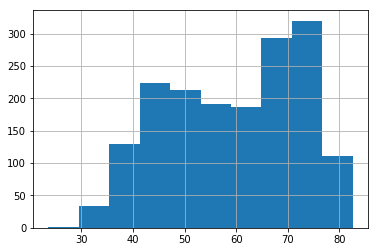

In [14]:
data["lifeExp"].hist()

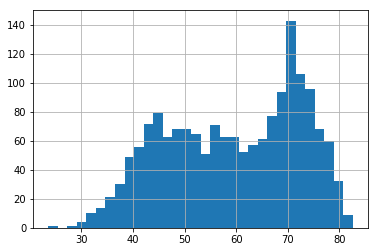

In [15]:
data["lifeExp"].hist(bins=32)